In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor


In [43]:
crime = pd.read_csv('/Users/Allison/desktop/sfdat22/notebooks/train.csv')

In [44]:
#convert the date to a datetime
crime["Dates"] = pd.to_datetime(crime["Dates"])
crime.set_index("Dates", inplace=True)

In [45]:
#Index the date features
crime['Year'] = crime.index.year
crime['Month'] = crime.index.month
crime['Day'] = crime.index.dayofweek
crime['Hour'] = crime.index.hour
crime.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour
Dates,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,2,23
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,2,23
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,2,23


In [11]:
#Add a column to determine weekend or weekday
crime['Weekend'] = crime.DayOfWeek.map({'Monday':0, 'Tuesday':0, 'Wednesday':0, 'Thursday':0, 'Friday':0, 'Saturday':1, 'Sunday':1})
crime.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Weekend
Dates,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,0
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,0
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,2,23,0
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,2,23,0
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,2,23,0


In [12]:
#Add a location with lat and long coordinates, (X is longitude and Y is latitude)
crime.head()
crime['Location'] = zip(crime['Y'], crime['X'])
crime.head(2)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Weekend,Location
Dates,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,0,"(37.7745985957, -122.425891675)"
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,0,"(37.7745985957, -122.425891675)"


In [13]:
#add distances from bart stations and test to see if vincenty distance function seems accurate. (Within 1 mile of the google maps distance)
from geopy.distance import vincenty
balboa_bart = (37.7216, -122.4475)
civic_bart = (37.7799, -122.4135)
glen_park = (37.7331, -122.4338)
mission_24th = (37.7525, -122.4181)
mission_16th = (37.7648, -122.42)
powell_bart = (37.7845, -122.408)
montgomery_bart = (37.7894, -122.4011)
embarcadero_bart = (37.7929, -122.3971)
vincenty(balboa_bart, civic_bart).miles

4.430939444174506

In [14]:
#add columns for distance from each bart station
crime['Glen_Park'] = crime['Location'].apply(lambda x: vincenty(x, glen_park).miles)
crime.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Weekend,Location,Glen_Park
Dates,,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,0,"(37.7745985957, -122.425891675)",2.894615
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,2,23,0,"(37.7745985957, -122.425891675)",2.894615
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,2,23,0,"(37.800414322, -122.424363021)",4.671147
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,2,23,0,"(37.8008726328, -122.426995327)",4.688917
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,2,23,0,"(37.7715411721, -122.438737623)",2.664928


In [15]:
#add columns for distance from each bart station
crime['Civic_Bart'] = crime['Location'].apply(lambda x: vincenty(x, civic_bart).miles)
crime['mission_24th'] = crime['Location'].apply(lambda x: vincenty(x, mission_24th).miles)
crime['mission_16th'] = crime['Location'].apply(lambda x: vincenty(x, mission_16th).miles)
crime['powell_bart'] = crime['Location'].apply(lambda x: vincenty(x, powell_bart).miles)
crime['montgomery_bart'] = crime['Location'].apply(lambda x: vincenty(x, montgomery_bart).miles)
crime['embarcadero_bart'] = crime['Location'].apply(lambda x: vincenty(x, embarcadero_bart).miles)

In [19]:
#add columns for distance from each bart station
crime['Balboa'] = crime['Location'].apply(lambda x: vincenty(x, balboa_bart).miles)
crime.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,...,Weekend,Location,Glen_Park,Civic_Bart,mission_24th,mission_16th,powell_bart,montgomery_bart,embarcadero_bart,Balboa
Dates,,,,,,,,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,...,0,"(37.7745985957, -122.425891675)",2.894615,0.770597,1.582659,0.748813,1.193946,1.698123,2.019104,3.841932
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,...,0,"(37.7745985957, -122.425891675)",2.894615,0.770597,1.582659,0.748813,1.193946,1.698123,2.019104,3.841932
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,...,0,"(37.800414322, -122.424363021)",4.671147,1.534671,3.322264,2.467812,1.416570,1.482543,1.579463,5.581275
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,...,0,"(37.8008726328, -122.426995327)",4.688917,1.624107,3.371484,2.517132,1.534875,1.623120,1.726000,5.581295
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,...,0,"(37.7715411721, -122.438737623)",2.664928,1.497018,1.732440,1.126282,1.905230,2.400337,2.713744,3.477561


In [17]:
# Use get_dummies to create numerical categories for districts
district_dummies = pd.get_dummies(crime['PdDistrict'])
district_dummies.head()

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Dates,,,,,,,,,,
2015-05-13 23:53:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:53:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:33:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:30:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:30:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
#concatinate the get_dummies district dataframe to my dataframe 

all_crimes = pd.concat([crime, district_dummies], axis=1)
all_crimes.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Dates,,,,,,,,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
crime.groupby('Hour').Category.value_counts()

Hour  Category                   
0     OTHER OFFENSES                 7375
      LARCENY/THEFT                  7019
      NON-CRIMINAL                   4305
      ASSAULT                        4291
      VANDALISM                      2681
      FRAUD                          2297
      VEHICLE THEFT                  2035
      SUSPICIOUS OCC                 2033
      DRUG/NARCOTIC                  1703
      WARRANTS                       1680
      FORGERY/COUNTERFEITING         1612
      BURGLARY                       1365
      ROBBERY                        1204
      MISSING PERSON                  804
      PROSTITUTION                    622
      SECONDARY CODES                 556
      SEX OFFENSES FORCIBLE           554
      WEAPON LAWS                     411
      DRUNKENNESS                     372
      DRIVING UNDER THE INFLUENCE     299
      EMBEZZLEMENT                    240
      DISORDERLY CONDUCT              236
      STOLEN PROPERTY                 220


In [20]:
all_crimes.columns

Index([u'Category', u'Descript', u'DayOfWeek', u'PdDistrict', u'Resolution',
       u'Address', u'X', u'Y', u'Year', u'Month', u'Day', u'Hour', u'Weekend',
       u'Location', u'Glen_Park', u'Civic_Bart', u'mission_24th',
       u'mission_16th', u'powell_bart', u'montgomery_bart',
       u'embarcadero_bart', u'Balboa', u'BAYVIEW', u'CENTRAL', u'INGLESIDE',
       u'MISSION', u'NORTHERN', u'PARK', u'RICHMOND', u'SOUTHERN', u'TARAVAL',
       u'TENDERLOIN'],
      dtype='object')

In [ ]:
#Categorize the categories!
money_crimes = ['BAD CHECKS', 'BRIBERY', 'EMBEZZLEMENT', 'EXTORTION','FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING']

In [ ]:
theft_crimes = ['BURGLARY', 'LARCENY/THEFT', 'ROBBERY', 'VEHICLE THEFT']

In [ ]:
other_crimes = ['OTHER OFFENSES']

In [ ]:
drug_crimes = ['DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'LIQUOR LAWS', ]

In [ ]:
property_crimes = ['ARSON', 'VANDALISM', 'TREA', 'TRESPASS', ]

In [ ]:
drop_crimes = ['RECOVERED VEHICLE', 'SUICIDE', 'PORNOGRAPHY/OBSCENE MAT', 'FAMILY OFFENSES', ]

In [ ]:
assualt_crimes = ['ASSAULT', 

In [ ]:
dangerous_crimes = ['SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'ASSAULT','DISORDERLY CONDUCT'

In [50]:
crime.groupby('PdDistrict').PdDistrict.value_counts()

PdDistrict  PdDistrict
0           0             105296
1           1              49313
2           2              78845
3           3              89431
4           4              45209
5           5              85460
6           6              65596
7           7              81809
8           8             119908
9           9             157182
dtype: int64

In [22]:
# all_crimes = all_crimes.drop('Dates',1)
all_crimes = all_crimes.drop('Descript',1)
all_crimes = all_crimes.drop('Resolution',1)
all_crimes = all_crimes.drop('Address',1)
all_crimes = all_crimes.drop('DayOfWeek',1)
all_crimes = all_crimes.drop('PdDistrict',1)
all_crimes.head()

,Category,X,Y,Year,Month,Day,Hour,Weekend,Location,Glen_Park,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Dates,,,,,,,,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,-122.425892,37.774599,2015,5,2,23,0,"(37.7745985957, -122.425891675)",2.894615,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:53:00,OTHER OFFENSES,-122.425892,37.774599,2015,5,2,23,0,"(37.7745985957, -122.425891675)",2.894615,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:33:00,OTHER OFFENSES,-122.424363,37.800414,2015,5,2,23,0,"(37.800414322, -122.424363021)",4.671147,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:30:00,LARCENY/THEFT,-122.426995,37.800873,2015,5,2,23,0,"(37.8008726328, -122.426995327)",4.688917,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:30:00,LARCENY/THEFT,-122.438738,37.771541,2015,5,2,23,0,"(37.7715411721, -122.438737623)",2.664928,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
all_crimes['Category'] = pd.factorize(all_crimes.Category)[0]
all_crimes.head(2)

,Category,X,Y,Year,Month,Day,Hour,Weekend,Location,Glen_Park,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Dates,,,,,,,,,,,,,,,,,,,,,
2015-05-13 23:53:00,0,-122.425892,37.774599,2015,5,2,23,0,"(37.7745985957, -122.425891675)",2.894615,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-05-13 23:53:00,1,-122.425892,37.774599,2015,5,2,23,0,"(37.7745985957, -122.425891675)",2.894615,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# feature_cols=['Balboa', 'Glen_Park', 'Civic_Bart', 'mission_24th', 'mission_16th', 'powell_bart', 'montgomery_bart', 'embarcadero_bart', 'BAYVIEW', 'TARAVAL', 'CENTRAL', 'NORTHERN', 'SOUTHERN', 'PARK', 'RICHMOND', 'TENDERLOIN', 'INGLESIDE', 'MISSION', 'Weekend','Hour']
feature_cols=['Balboa', 'Glen_Park', 'Civic_Bart', 'mission_24th', 'mission_16th', 'powell_bart', 'montgomery_bart', 'embarcadero_bart','Weekend','Hour']


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()

In [28]:
# define X and y
X = all_crimes[feature_cols]
y = all_crimes.Category
# print y.value_counts()

# split the new DataFrame into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [29]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [30]:
# list of values to try for max_depth
max_depth_range = range(12, 20)

# list to store the average Accuracy for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    print depth
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(treeclf, X, y, cv=5, scoring='accuracy').mean())

12
13
14
15
16
17
18
19


[0.25224787781964142,
 0.25437985736420426,
 0.25565653191050242,
 0.25598905296699648,
 0.25528183439967689,
 0.25371359267444882,
 0.2512342796496434,
 0.24841664656116533]

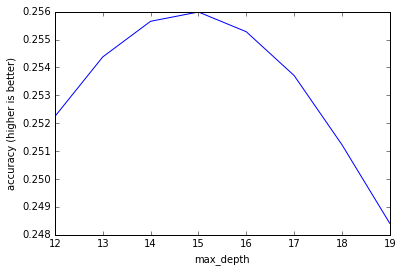

In [31]:
# plot max_depth (x-axis) versus Accurcy (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy (higher is better)')
accuracy_scores

In [32]:
# show the best accuracy and the corresponding max_depth
# sorted(zip(accuracy_scores, max_depth_range))[0]
sorted(zip(accuracy_scores, max_depth_range))

[(0.24841664656116533, 19),
 (0.2512342796496434, 18),
 (0.25224787781964142, 12),
 (0.25371359267444882, 17),
 (0.25437985736420426, 13),
 (0.25528183439967689, 16),
 (0.25565653191050242, 14),
 (0.25598905296699648, 15)]

In [33]:
# max_depth=15 was best, so fit a tree using that parameter
treeclf = DecisionTreeClassifier(max_depth=15, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [34]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}).sort('importance')

/Users/Allison/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,feature,importance
8,Weekend,0.038569
6,montgomery_bart,0.051755
1,Glen_Park,0.066507
2,Civic_Bart,0.080687
7,embarcadero_bart,0.088322
4,mission_16th,0.092683
3,mission_24th,0.112927
5,powell_bart,0.130788
0,Balboa,0.158445
9,Hour,0.179317


In [41]:
#trying a random forest 
#  list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfclf = RandomForestClassifier(n_estimators=estimator, random_state=1)
    accuracy_scores = cross_val_score(rfclf, X, y, cv=5, scoring='accuracy')
    accuraacy_scores.append((cross_val_score(treeclf, X, y, cv=5, scoring='accuracy')


SyntaxError: invalid syntax (<ipython-input-41-460e49d4a10a>, line 12)

In [ ]:
# plot estimte (x-axis) versus Accurcy (y-axis)
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('estimtors')
plt.ylabel('accuracy (higher is better)')